In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
import missingno as msno

5416 rows. 14 columns


&lt;AxesSubplot:&gt;

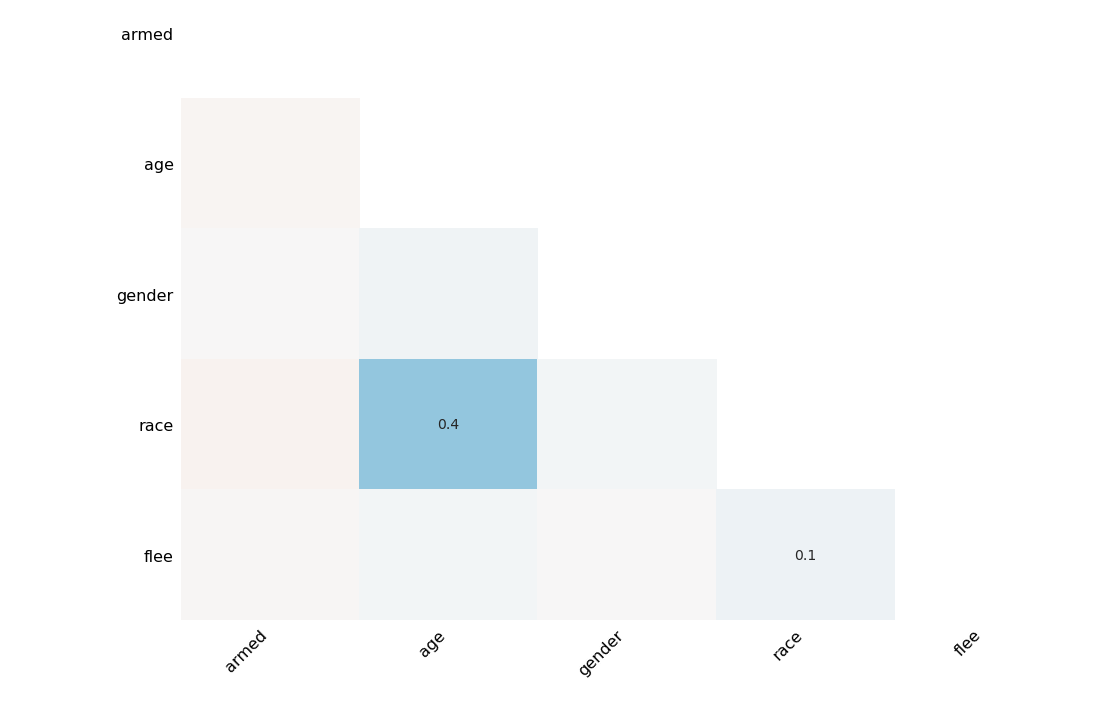

In [4]:
#reading file 
data=pd.read_csv('fatal-police-shootings-data.csv')
data.head()
print("{}".format(data.shape[0]),
"rows. {}".format(data.shape[1]), "columns")
data.isna().sum()
msno.heatmap(data)

In [5]:
#print data types
data.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

In [6]:
## Cleaning data

In [7]:
#checking for duplicate value
duplicate=data.duplicated()
data[duplicate]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera


In [8]:
#sorting  data acc. to id 
data.sort_values(by=['id'])

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5409,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,B,Crown Point,IN,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [9]:
#checking for future date 
today_date=dt.date.today()
data[(data['date']>'today_date')]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera


In [10]:
#reseting id 
data.drop(['id'], axis=1,inplace=True)
data.insert(0, 'ID', data.index + 1)
data

,ID,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5412,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5413,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5414,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5415,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [11]:
#checking for nan values 
nan_in_data = data.isnull().sum().sum() 
nan_in_data

1234

In [12]:
#droping nan value
data.dropna(inplace=True)

In [13]:
data.isna().sum()

ID                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [14]:
data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 4399 entries, 0 to 5413
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4399 non-null   int64  
 1   name                     4399 non-null   object 
 2   date                     4399 non-null   object 
 3   manner_of_death          4399 non-null   object 
 4   armed                    4399 non-null   object 
 5   age                      4399 non-null   float64
 6   gender                   4399 non-null   object 
 7   race                     4399 non-null   object 
 8   city                     4399 non-null   object 
 9   state                    4399 non-null   object 
 10  signs_of_mental_illness  4399 non-null   bool   
 11  threat_level             4399 non-null   object 
 12  flee                     4399 non-null   object 
 13  body_camera              4399 non-null   bool   
dtypes: bool(2)

In [15]:
age=np.array(data['age'])
alength=len(age)
date=np.array(data['date'])
dlength=len(date)

## check datatype of date column; code 0 is object

In [16]:
data['date_parsed']=pd.to_datetime(data['date'],format = "%Y-%m-%d")
data['date_parsed'].head()

0   2015-01-02
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-04
Name: date_parsed, dtype: datetime64[ns]

## plot

&lt;AxesSubplot:xlabel=&#39;years&#39;, ylabel=&#39;Density&#39;&gt;

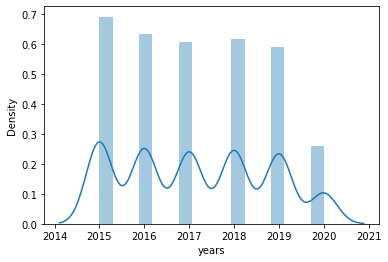

In [17]:
year_shooting=data['date_parsed'].dt.year
sns.distplot(year_shooting,axlabel="years")

In [18]:
data.describe()

,ID,age
count,4399.000000,4399.000000
mean,2590.711753,36.632871
std,1561.696424,12.803017
min,1.000000,6.000000
25%,1220.500000,27.000000
50%,2540.000000,34.000000
75%,3933.000000,45.000000
max,5414.000000,91.000000


In [19]:
#number of shootings of minors and people aged less than 25 years of age
k=0
for i in range  (0,alength):
    if age[i]<25:
        k=k+1
print('number of deaths under 25 years of age:',k)

number of deaths under 25 years of age: 768


In [ ]:
print(data.flee.value_counts())

In [ ]:

print(data.armed.value_counts())

In [21]:
data.flee.fillna('Not fleeing',inplace=True)

In [ ]:
df.armed.fillna(df.armed.value_counts().index[0], inplace=True)